In [119]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tqdm

In [137]:
file_path = "1.png"
img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [121]:
print(img.shape)
width = img.shape[1]
height = img.shape[0]
channels = img.shape[2]

(326, 550, 3)


In [138]:
img_arr = img.reshape([width * height, channels])

In [139]:
print(img.shape, img_arr.shape)

(326, 550, 3) (179300, 3)


In [124]:
n_clusters = list(range(2, 30 + 1, 1))
kmeans = []
inertias = []

In [125]:
for i in tqdm.trange(len(n_clusters)):
    kmeans.append(KMeans(n_clusters = n_clusters[i],random_state = 42))
    kmeans[-1].fit(img_arr)
    inertias.append(kmeans[-1].inertia_)

100%|██████████| 29/29 [00:44<00:00,  1.53s/it]


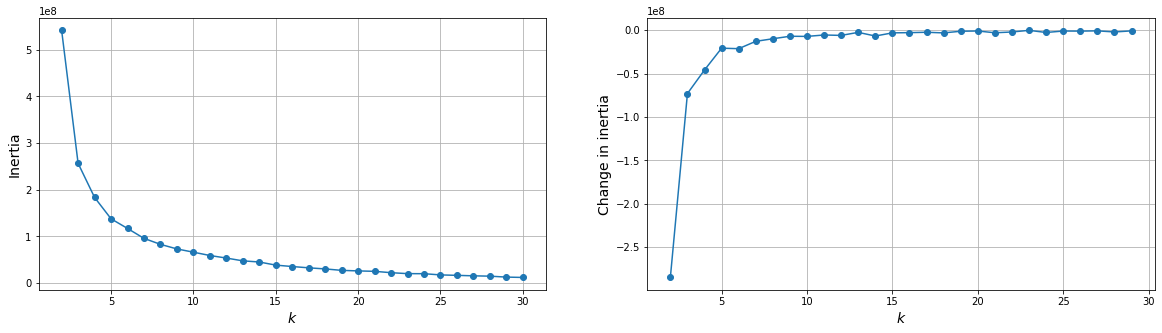

In [126]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
plt.plot(n_clusters, inertias, "-o")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Inertia", fontsize = 14)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(n_clusters[:-1], np.diff(inertias), "-o")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Change in inertia", fontsize = 14)
plt.grid(True)
plt.show()

In [132]:
# Use 6 clusters in the K-means.
kmeans = KMeans(n_clusters = 7, random_state = 42)
kmeans.fit(img_arr)

KMeans(n_clusters=7, random_state=42)

In [133]:

img_arr_kmeans = kmeans.cluster_centers_[kmeans.predict(img_arr)]
img_arr_kmeans = img_arr_kmeans.astype("uint8")

In [134]:
print(img_arr_kmeans.shape)

(179300, 3)


In [135]:
img_kmeans = img_arr_kmeans.reshape([height, width, channels])

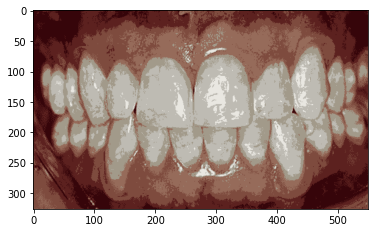

In [140]:
plt.imshow(img_kmeans)